In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from video_codec_cnn.extract_cnn_features import extract_features

Using TensorFlow backend.


In [5]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1/'

In [6]:
df = pd.read_csv('/nas/public/dataset/medifor/MFC18_EvalPart1_Video_Ver1-Reference/reference/manipulation-video/MFC18_EvalPart1-manipulation-video-ref.csv', sep='|')

In [7]:
df

,TaskID,ProbeFileID,ProbeFileName,IsTarget,ProbeMaskFileName,ProbeBitPlaneMaskFileName,ProbeBrowserFileName,BaseFileName,BaseBrowserFileName,JournalName,...,ManipulationCategory,Natural,PostprocessStabilization,DataEmbeddingSteganography,SemanticRestaging,SpatialMovingCamera,TemporalSplice,FaceManipulations,ReflectionManipulations,ShadowManipulations
0,manipulation,001c934acb38a59cb28b680b79485dcd,probe/001c934acb38a59cb28b680b79485dcd.mp4,N,NaN,NaN,001c934acb38a59cb28b680b79485dcd.mp4,world/001c934acb38a59cb28b680b79485dcd.mp4,001c934acb38a59cb28b680b79485dcd.mp4,001c934acb38a59cb28b680b79485dcd,...,no,no,no,no,no,no,no,no,no,no
1,manipulation,0091ab5777b1471fd91f064e4a60a595,probe/0091ab5777b1471fd91f064e4a60a595.mp4,N,NaN,NaN,0091ab5777b1471fd91f064e4a60a595.mp4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,manipulation,0129177928b30b3e69f5d4e423096443,probe/0129177928b30b3e69f5d4e423096443.mp4,N,NaN,NaN,0129177928b30b3e69f5d4e423096443.mp4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,manipulation,014626484bcedfa95d97be1cbf18a6c4,probe/014626484bcedfa95d97be1cbf18a6c4.mov,N,NaN,NaN,014626484bcedfa95d97be1cbf18a6c4.mov,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,manipulation,01a1abdac4b4a7d06e1b49c4bc6eab59,probe/01a1abdac4b4a7d06e1b49c4bc6eab59.mp4,N,NaN,NaN,01a1abdac4b4a7d06e1b49c4bc6eab59.mp4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,manipulation,01b24a3e3dbc4db3f2ae041a71706672,probe/01b24a3e3dbc4db3f2ae041a71706672.mp4,N,NaN,NaN,01b24a3e3dbc4db3f2ae041a71706672.mp4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,manipulation,01d1021c3452df3c3bdcbe950f7e632e,probe/01d1021c3452df3c3bdcbe950f7e632e.mp4,Y,NaN,NaN,01d1021c3452df3c3bdcbe950f7e632e.mp4,world/a827f69d3af269c37721e327d2788f0f.mp4,a827f69d3af269c37721e327d2788f0f.mp4,a827f69d3af269c37721e327d2788f0f,...,5-Unit,no,no,no,yes,no,no,no,no,no
7,manipulation,0213d4acd6353cdf2e3b0d8a657a6442,probe/0213d4acd6353cdf2e3b0d8a657a6442.mp4,N,NaN,NaN,0213d4acd6353cdf2e3b0d8a657a6442.mp4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,manipulation,022baa12715fe12cc78d6fbddfab9e7c,probe/022baa12715fe12cc78d6fbddfab9e7c.3gp,Y,NaN,NaN,022baa12715fe12cc78d6fbddfab9e7c.3gp,world/17708284a6eb1fb7b3cd65ac525dbf3e.mp4,17708284a6eb1fb7b3cd65ac525dbf3e.mp4,17708284a6eb1fb7b3cd65ac525dbf3e,...,4-Unit,no,no,no,yes,no,no,no,no,no
9,manipulation,02652f2f474dc52a9e8d48b04ebebd35,probe/02652f2f474dc52a9e8d48b04ebebd35.mov,N,NaN,NaN,02652f2f474dc52a9e8d48b04ebebd35.mov,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
non_target = 'probe/001c934acb38a59cb28b680b79485dcd.mp4' #0
target = 'probe/01d1021c3452df3c3bdcbe950f7e632e.mp4' #6

python3 extract_cnn_features.py --video_path file.mp4 --cnn_root cnn_folder --cnn_model cnn_name --feature_path file.npy

python ../cnn/validate_cnn.py --video_db_path /nas/home/pbestagini/video_codec_identification_icip/dataset/video_encoded/large/video_db.npy --hdf5_path /nas/home/pbestagini/video_codec_identification_icip/dataset/hdf5/large/mixed.hdf5 --cnn_model cnn_video_codec_seba --cnn_root ../models/cnn_video_codec_seba_selected


In [15]:
tv_path = os.path.join(dataset_root, target)
ntv_path = os.path.join(dataset_root, non_target)

In [16]:
extract_features(video_path=tv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba', 
                         feature_path= 'tv_ff.npy')

In [25]:
extract_features(video_path=ntv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba', 
                         feature_path= 'ntv_ff.npy')

In [26]:
tv_ff = np.load('tv_ff.npy')
ntv_ff = np.load('ntv_ff.npy')

In [21]:
tv_ff.shape

(4, 420)

<IPython.core.display.Javascript object>


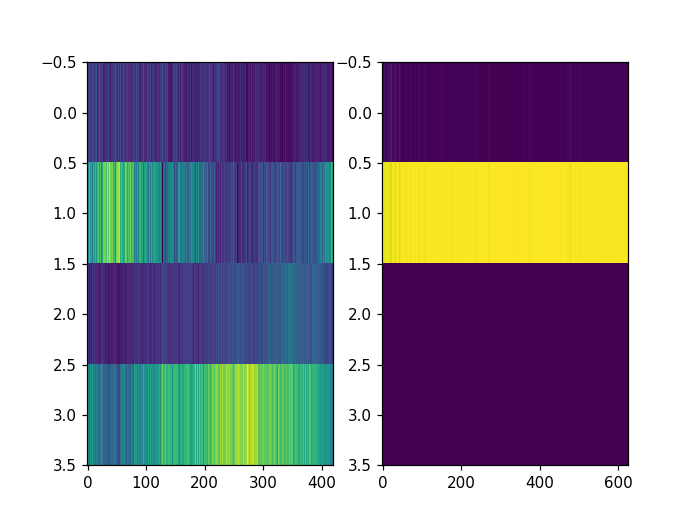

In [27]:
%matplotlib notebook
plt.subplot(1, 2, 1)
plt.imshow(tv_ff, aspect='auto')

plt.subplot(1, 2, 2)
plt.imshow(ntv_ff, aspect='auto')